# Seminar 2-3.  Bayesian Linear Regression 

<img src="https://go2phystech.ru/wp-content/uploads/2021/02/skolteh.jpeg" width=800 height=200 />

In [7]:
import numpy as np
from scipy.stats import multivariate_normal as mvn
from numpy.polynomial.polynomial import polyval
import matplotlib.pyplot as plt
%matplotlib inline

$\textbf{Notation:}$

- $X \in \mathbb{R}^{n\times d}$ - data
- $x_{i}\in \mathbb{R}^{d}$ - one data sample from n
- $Y \in \mathbb{R}^{n\times 1}$ - labels
- $y_{i} \in \mathbb{R}$ - one label from n 



## 1. Classical ML against Bayesian ML

<img src="https://www.freecodecamp.org/news/content/images/2024/02/Linear-regression-image.png" width=800 height=200 />
 

  
While we talk about classical ML approach it means, that we want to choose approprate weight matrix $w \in \mathbb{R}^{d\times1}$ in order to set equality in the equation below:

$$ Y = Xw$$

It is worth noticing that $w = [ w_{1},..,w_{d}]^{T}$ is column, and $w^{T}$  is a raw.

$\textbf{Motivation:}$ Learn these  weight from the data to set $\textbf{equality}$

While we solve classic linear regression, it means that we maximize likelihood of the model, $\textbf{why???}$ let's go:

$$\max_{w}p(Y|X,w) = \max_{w} \sum_{i=1}^{n} \log p(y_{i}|x_{i},w)$$

Let $p(y_{i}|x_{i},w) = \mathcal{N}(y_{i}| w^{T}x_{i},\beta^{-1})$, where $\beta = (\frac{1}{n}\sum_{i=1}^{n} (y_{i} - w^{T}x_{i})^{2})^{-1}$then:

$$ \max_{w} \sum_{i=1}^{n} \log \frac{1}{\sqrt{2\pi}\beta^{-0.5}}exp(- \frac{(y_{i} - w^{T}x_{i})^{2}}{2\beta^{-1}})$$

$$ \max_{w} [ -n\frac{1}{2}\log(2\pi) +. \frac{n}{2}\log\beta - \beta\sum_{i=1}^{n} \frac{(y_{i} - w^{T}x_{i})^{2}}{2}]$$

While maximize negative term, one can minimize  the same positive term:

$$ \min_{w}  \sum_{i=1}^{n}(y_{i}  - w^{T}x_{i})^{2} = \min_{w} || Y- Xw||^{2}_{2}$$  


To find the optimal value of weights , we make differentiaon over these weights:

$$ \frac{\partial|| Y- Xw||^{2}_{2} }{\partial w} = 0  \implies Y - Xw= 0$$

A little bit of manipulations from Linear Algebra:

$$  Y = Xw \implies X^{T}Y = X^{T}Xw  \implies  \boxed{w_{ml} = (X^{T}X)^{-1} X^{T}Y}$$

### 1.2 Bayesian ML

<img src="https://isssp.org/wp-content/uploads/2023/07/image1.png" width=800 height=200 />
  

First of all, we should understand that the Bayesian Linear Regression grows up from Bayes formula:

$$ p(w| X,y ) = \frac{p(y|X,w)p(w)}{\int_{W}p(y|X,w)p(w)dw}$$

We don't pay our attention th the integral is a constant, thus:

$$ p(w| X,y ) \approx p(y|X,w)p(w)$$

$\textbf{Important:}$ $p(w| X,y )$ is the distribution, however we do not a law that describes this distribution. To define which law describes the posterior, we should pay our attention to the final representation of the posterior

- $p(w)$ is prior distribtuion for parameters. We define oureselves that. Sincce the weights of learnable net lie near 0. Hence, one can define the prior as follows:

$$ p(w) = p(w|A) = \mathcal{N}(w|0, A^{-1}) = \prod_{j=1}^{d} \mathcal{N}(w_{j}|0,\alpha_{j}^{-1}): \quad A =\alpha I$$

- $p(y|X,w)$ is likelihood. As we have already sais, that:

$$ p(y|X, w) = \prod_{i=1}^{d} p(y_{i}|x_{i},w) = \mathcal{N}(y_{i}|w^{T}x_{i}, \beta^{-1})$$

Since likelihood and prior are normnal, then it means that posterior is normla too. Thus:

$$ p(w|X,y) = \mathcal{N}(w|\mu, \Sigma) $$



### 1.3 Find Mean of posterior

Derivation of mean for the posterior distribution. One can recall dimensionalities of data:

$ X \in \mathbb{R}^{n\times d}, Y \in \mathbb{R}^{n\times 1}, w  \in \mathbb{R}^{d\times 1} $

$\textbf{Idea:}$ Since the prior is one-mode Gaussian distribution and likelihood is too. Then, the posterior is one-mode normal too. The mean of normal distribution correpsond to the point where the propbability is highest. By other words, it is extremum point of the probability and mean is such point where derivative of the distribution $p(w|X,y)$ equals to zero.


$$\mu = w^{*}: \frac{\partial p(w|X,y)}{\partial w}|_{w^{*}} = 0  $$

Since the logarithmoc case is easier, let me move on the logarithmic expression:

$$ \log p(w|X,y) \approx \log p(y|X,w) + \log p(w|A)$$

$$ \log p(w|X,y) \approx \log(\frac{1}{(2\pi)^{d/2}det(B)^{1/2}})exp(...) + \log(\frac{1}{(2\pi)^{d/2} \sqrt{det(A^{-1})}}exp(\frac{-w^{T}Aw}{2}))$$

$$ \log p(w|X,y) \approx C_{1} - \frac{\beta}{2}\sum_{i=1}^{n}(y_{i} - w^{T}x_{i})^{2} +  C_{2} - \frac{1}{2}w^{T}Aw $$

$$ \log p(w|X,y) \approx  -\frac{\beta}{2}(Y - Xw)^{T}(Y- Xw) - \frac{w^{T}Aw}{2}$$

$$ \log p(w|X,y) \approx \frac{-\beta}{2}(Y^{T}Y - Y^{T}Xw - (Xw)^{T}Y + (Xw)^{T}Xw) - \frac{w^{T}Aw}{2}$$

$$ \log p(w|X,y) \approx \frac{-\beta}{2}(-2Y^{T}Xw + w^{T}X^{T}Xw) - \frac{w^{T}Aw}{2}$$

$$ \frac{ \partial \log p(w|X,y)}{\partial w}  = 0 = \beta Y^{T}X - \beta w^{T}X^{T}X- w^{T}A  $$

$$ w^{*} = ((\beta X^{T}X + A)^{T})^{-1}\beta X^{T}Y  $$


Since $(A+B)^{T} = A^{T} + B^{T}$, hence: $(\beta X^{T}X + A)^{T} = \beta X^{T}X + \underbrace{A^{T}}_{\text diag} = \beta X^{T}X + A $

Then: $$ \boxed{w^{*} = (\beta X^{T}X + A)^{-1} \beta X^{T}Y}$$


$\textbf{Notes:}$ Different prior covariance setups: 

- $\lim_{\alpha \to \infty} w^{*} = 0$

- $\lim_{\alpha \to 0} w^{*} = w_{ml}$  

  

$\textbf{Notes:}$

Bayesian ML = Classical ML + regularization , in other words:

$$ || Y-  Xw ||^{2}_{2} + \alpha||w||^{2} $$

### 1.4 Find covariance of posterior

$$\frac{\partial }{\partial w}(\beta Y^{T}X - \beta w^{T}X^{T}X - w^{T}A) = 0 $$

$$ -\beta X^{T}X - A = 0 \implies \Sigma_{w} = \beta X^{T}X + A  \implies \Sigma^{-1}_{w} = (\beta X^{T}X + A)^{-1} $$

- questions:

1) How to choose $\alpha$?

2) Small $\alpha$, what does it mean?

3) Big $\alpha$?


<img src="https://media.baamboozle.com/uploads/images/529724/1641691775_8602000.gif" width=800 height=200 />

 

## 2. Relevance Vector Machine: Sequential updates

$\textbf{Idea:}$

Let our data is composed of 2 data points $(x_{1},y_{1}), (x_{2},y_{2})$ and are independent.

$$ p(w|X,y) = p(w| (x_{1},y_{1}), (x_{2},y_{2}) )p(w) \approx p((x_{2},y_{2})|w) \underbrace{p((x_{1},y_{1})|w)p(w)}_{\text{posterior after 1st step}} =  p((x_{2},y_{2})|w)\underbrace{p(w|(x_{1},y_{1}))}_{\text{new prior}}$$

We write the formula of posterior when $n = 2$

$$ \log p(w | (x_{1},y_{1}), (x_{2},y_{2})) \approx -\frac{\beta}{2}(Y_{(1,2)} - X_{(1,2)}w)^{T}(Y_{(1,2)} - X_{(1,2)}w) - \frac{1}{2}(w- \mu_{1})^{T}\Sigma^{-1}_{w} (w - \mu_{1}) $$

We make the same operations to find $\textbf{mean}$ and $\textbf{covariance}$

$$ \log p(w|(x_{1},y_{1}), (x_{2},y_{2})) \approx - \frac{\beta}{2}(Y^{T}Y - 2Y^{T}Xw  + (Xw)^{T}Xw) - \frac{1}{2}(w - \mu_{1})^{T}\Sigma^{-1}_{1}(w - \mu_{1})$$

We perform differentiation over $w$ and it equals to zero to find mode:

$$ \frac{\partial \log p(w|(x_{1},y_{1}), (x_{2},y_{2})) }{\partial w} \approx \beta Y^{T}X - \beta w^{T}X^{T}X - w^{T}\Sigma^{-1}_{1} + \mu_{1}^{T}\Sigma^{-1}_{1} = 0 $$

$$ (\beta X^{T}X + \Sigma^{-1}_{1})^{T} w = \beta Y^{T}X + \mu_{1}^{T} \Sigma^{-1}_{1}$$

Since $\Sigma^{-1}_{1}$ is diaginal matrix:

$$ w = (\beta X_{(1,2)}^{T}X_{(1,2)} + \Sigma^{-1}_{1})^{-1} ( \beta X_{(1,2)}^{T}Y_{(1,2)} +  \Sigma^{-1}_{1}\mu_{1}) $$

#### find variance 


$$ \Sigma_{(1,2)} = (\beta X^{T}_{(1,2)}X_{(1,2)} +\Sigma_{1}^{-1})^{-1} $$

### Algorithm

We consider the following model:

- Likelihood model for one item from data : $p(y_n|x_n, w;\beta) = \mathcal{N}(y_n| \textbf{w}^Tx_n, \beta^{-1})$
- Likelihood model for whole data: $p(\textbf{y}|X,\textbf{w};\beta) = \prod\limits_{n=1}^{N}p(y_n|x_n,\textbf{w};\beta) = \mathcal{N}(\textbf{y}|X\textbf{w}, \beta^{-1})$
- Prior: $p(\textbf{w};\alpha) = \prod\limits_{d=1}^{D}\mathcal{N}(w_d|0, \alpha_d^{-1})=\mathcal{N}(\textbf{w}|0,A^{-1})$
    

And for sequential updates we come up with the following equations:


- Observe $(X,\textbf{t})^{1}$ and obtain:

    $$\Sigma_{w}^{-1} = [\beta X_{(1)}^TX_{(1)} + A]$$
    $$\mu_{w} = \Sigma_{w}\beta X^T_{(1)}\textbf{t}_{(1)}$$
    
    
- Observe $(X,\textbf{t})^{2}$ and then for joint data:

    $$\Sigma_{w,(1,2)}^{-1} = [\beta X_{(2)}^T X_{(2)} + \Sigma_{w}^{-1}]$$
    
    $$\mu_{w,(1,2)} = \Sigma_{w,(1,2)}(\beta X_{(2)}^T\textbf{t}_{(2)}+\Sigma^{-1}_w\mu_w)$$

- $\dots$

### Task 1 

Here, we define our model:

- $\textit{init}$ takes $\beta$ for likelihood model and W_pr constitutes parameters of current prior
- $\textit{update_w}$ is calculation of parameters of current posterior(future prior)
- $\textit{plot_w_space}$ makes plotting of current posterior distribution

In [8]:
class BLR:
    def __init__(self, A, beta, x_dim=2):
        self.w_Pr = {'mu': np.zeros(x_dim), 'cov': np.linalg.inv(A), 'inv_cov': A}
        self.beta = beta
    
    
    def update_w(self, X, y, verbose=False):
        inv_cov = self.beta * X.T @ X + self.w_Pr['inv_cov']
        cov = np.linalg.inv(inv_cov)
        mu = cov @ (self.beta * X.T @ y[:,None] + self.w_Pr['inv_cov'] @ self.w_Pr['mu'][:,None])
        
        self.w_Pr = {'mu': mu.flatten(), 'cov': cov, 'inv_cov': inv_cov}
        return {'mu': mu.flatten(), 'cov': cov, 'inv_cov': inv_cov} if verbose else 0.0
    
    
    def plot_w_space(self, ax, b=15.):
        xx, yy = np.mgrid[-b:b:0.01, -b:b:0.01]
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = mvn.logpdf(grid, mean=self.w_Pr['mu'], cov=self.w_Pr['cov'])
        contour = ax.contourf(xx,yy,probs.reshape(xx.shape))
    
    def plot_data_space(self, x, y, ax):
        a, b = (-1.1, 1.1) 
        for i in range(50): 
            w = np.random.multivariate_normal(self.w_Pr['mu'], self.w_Pr['cov'])
            ax.plot(np.array([a,b]), np.array([w[0]+w[1]*a, w[0]+w[1]*b]), 'r-', alpha=0.15)
            
        ax.scatter(x[:,:,1].flatten(), y.flatten(), edgecolor="white", alpha=0.75, color='blue')
        ax.scatter(x[-1,:,1].flatten(), y[-1].flatten(), edgecolor="white", alpha=1., color='green')
        
        
        
    def plot_poly_data_space(self, x, y, ax, k=2):
        k_points = np.linspace(-1.1, 1.1, num=k+1)
        for i in range(50):
            w = np.random.multivariate_normal(self.w_Pr['mu'], self.w_Pr['cov'])
            poly_values = np.zeros_like(k_points)
            poly_values = polyval(k_points, w)
            ax.plot(k_points, poly_values, 'r-', alpha=0.15)
        
        ax.scatter(x[:,:,1].flatten(), y.flatten(), edgecolor="white", alpha=0.75, color='blue')
        ax.scatter(x[-1,:,1].flatten(), y[-1].flatten(), edgecolor="white", alpha=1., color='green')
        
     

In [9]:
reg = BLR(np.diag([0.1, 0.1]), 1.)

In [10]:
# make matrice X
x1 = np.linspace(-1, 1, 10)
np.random.shuffle(x1)
x1 = x1.reshape(5, 2)
x0 = np.ones_like(x1)
X = np.stack([x0, x1], axis=-1)

# make targets y 
y = 1.5 + 12. * x1
y += np.random.randn(*y.shape) * 3.5

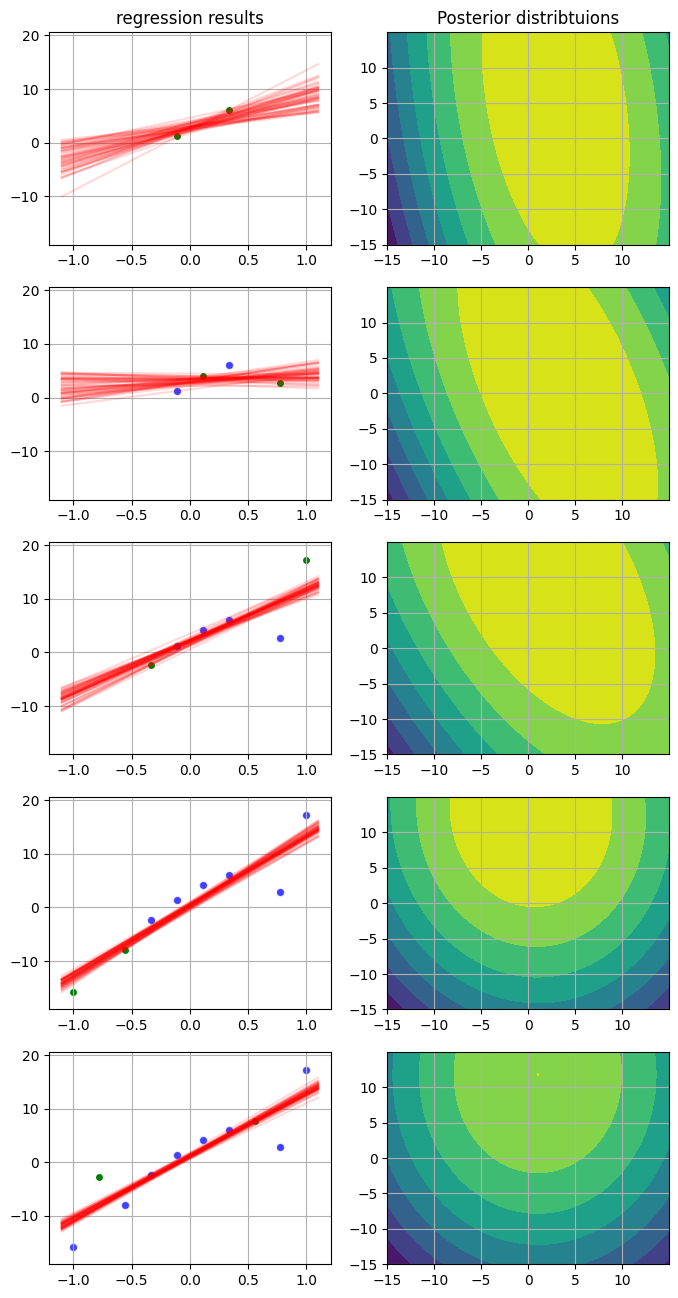

In [11]:
chunks = 5 # divide dataset to 5 parts (M=5)

#plotting utils
fig, ax = plt.subplots(chunks,2, figsize=(8,16))
ymin, ymax = y[:,1].min(), y[:,1].max()
yrange = ymax - ymin
ymin, ymax = ymin - 0.1 * yrange, ymax + 0.1 * yrange

for i in range(chunks):
    reg.update_w(X[i], y[i])
    reg.plot_data_space(X[:i+1], y[:i+1], ax[i,0])
    ax[i, 0].set_ylim(ymin, ymax)
    reg.plot_w_space(ax[i,1])
    ax[i, 0].grid(), ax[i, 1].grid() 
    ax[0,0].set_title('regression results')
    ax[0,1].set_title('Posterior distribtuions')

## 3. Relevance Vector Machine

In [ ]:
# see the seminar 3 (on whiteboard)